# Matemática para Ciencia de los Datos
# Trabajo Práctico 4

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 22 de Mayo del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Nombre_Estudiante_1**
1. **Nombre_Estudiante_2**



---

## Parte 1

Dada la siguiente matriz:

\begin{equation}
A= \begin{bmatrix}
   1.,2. \\
   3.,4.
\end{bmatrix}
\end{equation}




**Ejercicio 1.1 (25 puntos)**

En una celda de texto, calcule los auto-valores y los auto-vectores como los ejemplos vistos en clase. Debe mostrar todo el procedimiento.  Lo que si puede es usar la calculadora (o instrucciones de python) para resolver las ecuaciones al final --indique cual opción utilizó--.


Primero, encontrar tanto los vectores $\vec{x}$ como los valores $\lambda$ dados por:

$
\begin{bmatrix}
1. & 2.\\
3. & 4.
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}=
\lambda
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
$

Calcular el determinante de $(A-\lambda \textrm{I})$:

\begin{equation}
\textrm{det}\left(\begin{bmatrix}1. - \lambda & 2.\\ 3. & 4. - \lambda\end{bmatrix}\right)=0 \\
(1. - \lambda)(4. - \lambda) - 2.*3.=0 \\
\lambda^2 - 5 \lambda - 2 = 0 
\end{equation}

Por lo tanto, se puede llegar a que $\lambda_1=1$ y $\lambda_2=6$

Una vez conocidos los valores $\lambda$ sólo resta sustituir como escalares que multiplican la matriz identidad en la ecuación:


\begin{equation}
(A-\lambda \textrm{I}) \vec{x} = 0
\end{equation}


Esto genera dos casos para
 
$\lambda_1= (5 \pm \sqrt{33})/ 2  $ 

$\lambda_2=(5 - \sqrt{33})/ 2  $

Se utilizó python para la normalización:


In [3]:
#Normalizado
import numpy as np

v1 = np.array([(-1 * 33**(1/2) - 3) / 6, 1])
v1 = v1 / np.linalg.norm(v1)
v1


array([0.41597356, 0.90937671])

In [4]:

v2 = np.array([(1 * 33**(1/2) - 3) / 6, 1])
v2 = v2 / np.linalg.norm(v2)
v2

array([0.41597356, 0.90937671])

**Ejercicio 1.2 (25 puntos)**

En una celda de código y utilizando la función eig de numpy, calcule los auto-valores y auto-vectores y haga las operaciones en el código para mostrar que se cumple: $A\,\vec{x} = \lambda\vec{x}$ (No olvide las pequeñas posibles diferencias por precisión de la representación numérica).


In [ ]:
import numpy as np
from numpy import linalg as LA

A = np.array([[1.0, 2.0], [3.0, 4.0]])
w, v = LA.eig(A)
print (w)
print (v)

for i in range(len(w)):
    autovalor = w[i]
    autovector = v[:, i]

    Ax = np.dot(A, autovector)
    Lx = autovalor * autovector

    if np.allclose(Ax, Lx):
        print("Se cumple la igualdad Ax = Lx")
    else:
        print("La igualdad Ax = Lx no se cumple")

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
Se cumple la igualdad Ax = Lx
Se cumple la igualdad Ax = Lx



---

## Parte 2


Realice lo siguiente: **(40 puntos)**
1. Similar a los ejemplos vistos, aplíquele la estrategia PCA a los datos en el archivo adjunto "data_banknote_authentication.csv" (el $Y$ corresponde a la columna llamada clase). 
1. En este caso use los tres primeros componentes principales (no dos como en el ejemplo).
1. El ejercicio termina graficando la varianza acumulada versus los componentes principales.

---



In [6]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
archivo = ('/content/drive/MyDrive/Colab Notebooks/Módulo 1/Tareas/Tarea 4/data_banknote_authentication.csv')

DataFrame = pd.read_csv(archivo, header = 0, delimiter =';')

X = DataFrame.iloc[:,:4]
Y = DataFrame.iloc[:,-1]

X_zscaled = (X - X.mean()) / X.std(ddof=1)

# calcula los auto-valores y auto-vectores
eigenvalues, eigenvectors = np.linalg.eig( np.cov(X_zscaled,rowvar=False))

# los normaliza
eigenvalues_normalized = eigenvalues / eigenvalues.sum()
# calcula la varianza explicada
cumvar_explained = np.cumsum(eigenvalues_normalized)

# Ordenar de mayor a menor, 
# debido a que np.linalg.eig no asegura que vengan ordenados
idx = np.argsort(eigenvalues) 
print( "idx: ", idx )
idx = idx[::-1]     
print("\n\nidx[::-1]: ", idx  )

# Ordenar tanto los autovalroes como los autovectores
eigenvectors = eigenvectors[:,idx]
eigenvalues = eigenvalues[idx]

# Proyecta los datos y los grafica
T = pd.DataFrame(X_zscaled.dot(eigenvectors))

# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3', 'pc4']

# agrega la etiqueta de las especies
T = pd.concat([T, Y], axis=1)

print("Parte de las muestras proyectadas")
print(T.head(5))

idx:  [3 2 1 0]


idx[::-1]:  [0 1 2 3]
Parte de las muestras proyectadas
        pc1       pc2       pc3       pc4  class
0 -1.472268 -1.163492 -0.167193 -0.325605      0
1 -1.638843 -1.093413  0.371052 -0.150809      0
2  0.513732 -1.324397  0.508926  0.425778      0
3 -2.310110 -0.202441  0.540584  0.143742      0
4  1.192981  0.024645  0.421036  0.364361      0


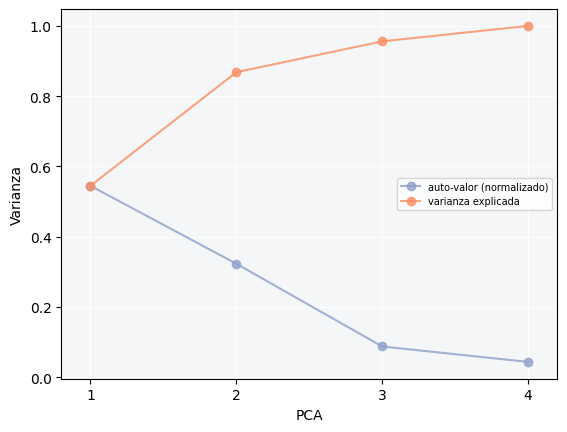

In [8]:
_, (ax1) = plt.subplots(1,sharey=False)

# muestra el componente principal respecto al total de varianza en los datos
ax1.plot([1,2,3,4],
         eigenvalues_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valor (normalizado)',
         alpha=0.8,
         zorder=1000)

ax1.plot([1,2,3,4],
         cumvar_explained,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

ax1.set_xlim(0.8, 4.2)
ax1.set_xticks([1,2,3,4])
ax1.set_xlabel('PCA')
ax1.set_ylabel('Varianza')
ax1.legend(loc='center right', fontsize=7)
ax1.grid(color='#fdfefe')
ax1.set_facecolor('#f4f6f7')

___

## Parte 3

Como en el segundo gráfico del cuaderno visto en clase sobre PCA, grafique los tres mayores componentes principales utilizando la bibioteca **plotly** https://plotly.com/python/3d-scatter-plots/  **(10 puntos)**


___

In [9]:
import plotly.express as px

# Convert the last column to strings
DataFrame['category'] = DataFrame.iloc[:, -1].astype(str)

fig = px.scatter_3d(T, x='pc1', y='pc2', z='pc3', color='category', color_discrete_sequence=['blue', 'red'])
fig.show()

ValueError: ignored